In [1]:
import sys
sys.path.append('../..')
%matplotlib inline

# Naive Strategy

In [3]:
from lib import ngdb
import numpy as np
import seaborn as sns

In [4]:
db=ngdb.NamingGamesDB("naive.db")

In [5]:
nb_iter = 4
M = 20
W = 20
values = [
    {'strat_type':'naive'}]
#    {'strat_type':'success_threshold_wise', 'threshold_explo': 0.85  },
#    {'strat_type':'mincounts', 'mincounts': 20   },
#    {'strat_type':'decision_vector_gainsoftmax', 'M':M, 'W':W, 'Temp': 0.2  }
#    ]
Tmax = 1400000

In [6]:
xp_base_cfg = {
    'pop_cfg':{
        'voc_cfg':{
            'voc_type':'sparse_matrix',
            'M':M,
            'W':W
            },
        'strat_cfg':{},
        'interact_cfg':{'interact_type':'speakerschoice'},
        'nbagent':20
        },
    'step':1000
    }

def xp_cfg(strat_cfg):
    xp_base_cfg['pop_cfg']['strat_cfg']= strat_cfg
    return xp_base_cfg

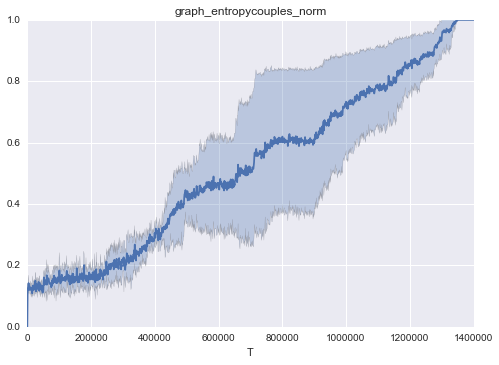

In [7]:
def graph_iter(strat_cfg):
    graph_list = []
    uuid_list = []
    for i in range(nb_iter):
        exp = db.get_experiment(blacklist=uuid_list, **xp_cfg(strat_cfg))
        exp.continue_exp_until(Tmax)
        uuid_list.append(exp.uuid)
        graph_list.append(exp.graph('entropycouples_norm', tmax=Tmax))
    graph=graph_list[0]
    for i in range(1, nb_iter):
        graph.add_graph(graph_list[i])
    graph.merge()
    return graph

graph=graph_iter(values[0])
graph.legend_permut = []
graph.show()

In [8]:
for i in range(1,len(values)):
    graph.add_graph(graph_iter(values[i]))

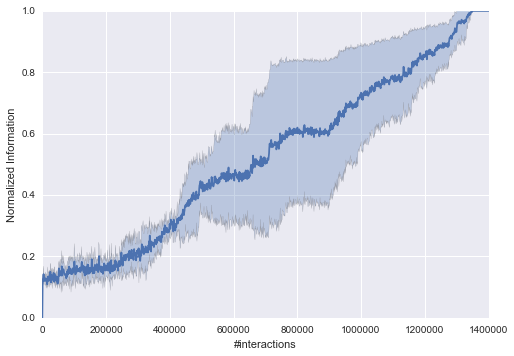

In [12]:
graph.title = ''
graph.xlabel = '#interactions'
graph.ylabel = 'Normalized Information'

replace = {
    'naive':'Naive',
    'mincounts':'Minimal Counts',
    'success_threshold_wise':'Success Threshold',
    'decision_vector_gainsoftmax':'Info. Gain soft maximization'
    }
 
#graph.Yoptions[0]['color'] = ''
#graph.Yoptions[1]['color'] = sns.color_palette()[2]
#graph.Yoptions[2]['color'] =
#graph.Yoptions[3]['color'] = 'black'
    
graph.legendoptions['bbox_to_anchor'] = (0,0,1,0.7)
graph.legend_permut = []
graph.show()